# Import dependencies

In [316]:
import matplotlib.pyplot as plt
import numpy as np 
import cv2 as cv
from utils import *

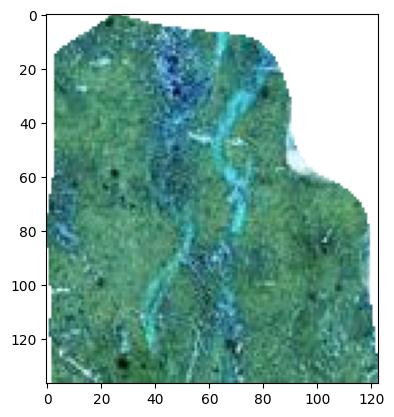

In [302]:
img = cv.imread('5.34.33.png', cv.IMREAD_UNCHANGED)

# change color model from bgr to rgb: switch b and r channels 
# get image's channels 
r, g, b, a = cv.split(img)

# stack and merge channels in the right order
img = cv.merge((r, g, b, a))

plt.imshow(img)
plt.show()

In [303]:
img.shape

(137, 123, 4)

In [304]:
# detect the edges exploiting the alpha channel
# get transparency pixels: alpha value == 0
alpha_pixels = np.where(img[:, :, 3] == 0)
alpha_pixels

(array([  0,   0,   0, ..., 135, 136, 136]), array([0, 1, 2, ..., 1, 0, 1]))

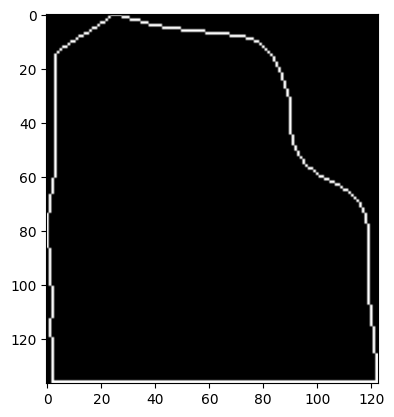

In [328]:
rows, cols, _ = img.shape 
edge_img = np.zeros((rows, cols), dtype=np.uint8)

# Create an array to store the offsets for neighboring pixels
neighbor_offsets = np.array([[1, 0], [-1, 0], [0, 1], [0, -1]])

for x in range(rows):
    for y in range(cols):
        # Skip if alpha is zero
        if img[x][y][3] == 0:
            continue
        
        # Iterate over neighboring pixels
        for offset_x, offset_y in neighbor_offsets:
            neighbor_x = x + offset_x
            neighbor_y = y + offset_y
            
            # Check if neighbor is out of bounds or has alpha zero
            if (not (0 <= neighbor_x < rows and 0 <= neighbor_y < cols) 
                    or img[neighbor_x][neighbor_y][3] == 0):
                edge_img[x][y] = 1
                break
          
plt.set_cmap('gray')      
plt.imshow(edge_img)
plt.show()

In [312]:
# Extract the alpha channel
alpha_channel = img[:, :, 3]

# Count occurrences of each unique value in the alpha channel
unique_values, counts = np.unique(alpha_channel, return_counts=True)

# Print the counts for each unique value
for value, count in zip(unique_values, counts):
    print(f"Value {value}: Count {count}")

Value 0: Count 3097
Value 251: Count 13754
